In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
anime_basics = pd.read_csv('epsilon_work_3.csv')


In [33]:
anime_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5374 entries, 0 to 5373
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Anime ID            5374 non-null   int64 
 1   Title               5374 non-null   object
 2   Producers           5374 non-null   object
 3   Streaming Platform  5374 non-null   object
 4   Genre               5374 non-null   object
 5   Type                5374 non-null   object
 6   Studio              5374 non-null   object
 7   Source              5374 non-null   object
 8   A/R Ratings         5374 non-null   object
dtypes: int64(1), object(8)
memory usage: 378.0+ KB


In [35]:
# Unique value counts by column
col=anime_basics.columns
for i in col:
    print(i,anime_basics[i].nunique())

Anime ID 5374
Title 5374
Producers 36
Streaming Platform 948
Genre 942
Type 4
Studio 10
Source 6
A/R Ratings 4


In [36]:
def filter(i,x:list,out=''):
    for j in x:
        if i.find(j)!=-1:
            out+=j+','
    return out

def flat(i,out:dict):
    for j in i.split(','):
        if j in out:
            out[j]+=1
    return out

In [37]:
# Filtering the streaming platforms
platforms=['Netflix','Amazon Prime','Hulu','Crunchyroll','Funimation','VRV','Tubi','Apple TV+','Disney+','HBO Max','YouTube Premium']
for i in anime_basics['Streaming Platform']:
    z=filter(i,platforms)
    anime_basics['Streaming Platform']=anime_basics['Streaming Platform'].replace(i,z)
anime_basics['Streaming Platform'].value_counts()


Streaming Platform
HBO Max,                                  182
VRV,                                      173
Hulu,                                     165
Crunchyroll,                              165
Funimation,                               165
                                         ... 
Hulu,Crunchyroll,Tubi,                      5
Netflix,Tubi,HBO Max,                       5
Crunchyroll,Funimation,Disney+,             4
Crunchyroll,Apple TV+,YouTube Premium,      4
Hulu,Tubi,HBO Max,                          4
Name: count, Length: 231, dtype: int64

In [38]:
anime_basics.head()

,Anime ID,Title,Producers,Streaming Platform,Genre,Type,Studio,Source,A/R Ratings
0,416,Ability enter,"Aniplex, TV Tokyo","Apple TV+,YouTube Premium,",DramaAction,ONA,Toei Animation,Original,G
1,447,Although,"Bandai Namco, Aniplex","Hulu,",Comedy,TV,MAPPA,Visual Novel,PG
2,471,Dog office into,"Aniplex, TV Tokyo","Hulu,Apple TV+,",HorrorAction,OVA,Kyoto Animation,Game,PG
3,556,Fall kitchen through,Kadokawa,"Hulu,",RomanceActionAdventure,TV,A-1 Pictures,Game,PG-13
4,723,Decision service,Shueisha,"VRV,YouTube Premium,",Drama,TV,Ufotable,Original,R


In [39]:
# Filtering the Platforms
platform={'Netflix':0,'Amazon Prime':0,'Hulu':0,'Crunchyroll':0,'Funimation':0,'VRV':0,'Tubi':0,'Apple TV+':0,'Disney+':0,'HBO Max':0,'YouTube Premium':0}
for i in anime_basics['Streaming Platform']:
    z=flat(i,platform)
platform_count=pd.DataFrame(platform.items(),columns=['Platform','Count'])
platform_count

,Platform,Count
0,Netflix,955
1,Amazon Prime,967
2,Hulu,1030
3,Crunchyroll,971
4,Funimation,958
5,VRV,1000
6,Tubi,928
7,Apple TV+,954
8,Disney+,991
9,HBO Max,1029


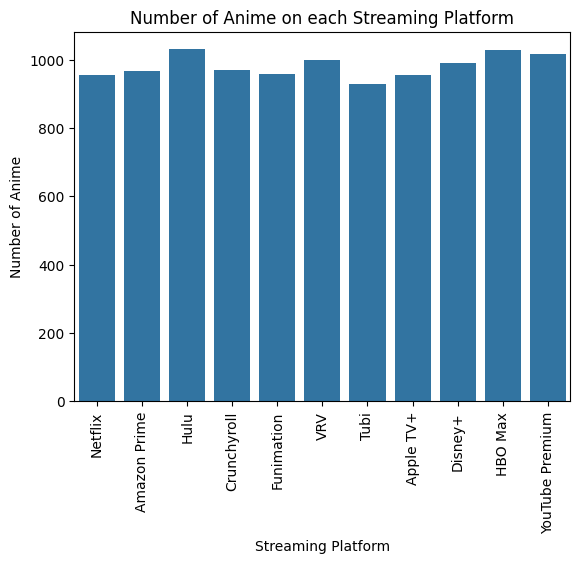

In [40]:
sns.barplot(x=platform_count['Platform'],y=platform_count['Count'])
plt.xticks(rotation=90)
plt.xlabel('Streaming Platform')
plt.ylabel('Number of Anime')
plt.title('Number of Anime on each Streaming Platform')
plt.show()



In [41]:
# Filtering the genres
genres=['Action','Adventure','Comedy','Drama','Fantasy','Magic','Mystery','Psychological','Romance','Sci-Fi','Thriller','Sports','Slice of Life','Mecha','Music','Supernatural','Horror','Military','Demons','Historical','Seinen','Shounen','Shoujo','Josei']

for i in anime_basics['Genre']:
    z=filter(i,genres)
    anime_basics['Genre']=anime_basics['Genre'].replace(i,z)
anime_basics['Genre'].value_counts()


Genre
Horror,                    185
Mystery,                   174
Sci-Fi,                    174
Supernatural,              164
Action,                    162
                          ... 
Action,Fantasy,Mystery,      5
Fantasy,Sci-Fi,Horror,       5
Action,Mystery,Horror,       5
Fantasy,Romance,Sci-Fi,      5
Action,Mystery,Romance,      4
Name: count, Length: 231, dtype: int64

In [42]:
anime_basics.head()

,Anime ID,Title,Producers,Streaming Platform,Genre,Type,Studio,Source,A/R Ratings
0,416,Ability enter,"Aniplex, TV Tokyo","Apple TV+,YouTube Premium,","Action,Drama,",ONA,Toei Animation,Original,G
1,447,Although,"Bandai Namco, Aniplex","Hulu,","Comedy,",TV,MAPPA,Visual Novel,PG
2,471,Dog office into,"Aniplex, TV Tokyo","Hulu,Apple TV+,","Action,Horror,",OVA,Kyoto Animation,Game,PG
3,556,Fall kitchen through,Kadokawa,"Hulu,","Action,Adventure,Romance,",TV,A-1 Pictures,Game,PG-13
4,723,Decision service,Shueisha,"VRV,YouTube Premium,","Drama,",TV,Ufotable,Original,R


In [43]:
# Filtering the Genres
genre={'Action':0,'Adventure':0,'Comedy':0,'Drama':0,'Fantasy':0,'Mystery':0,'Romance':0,'Sci-Fi':0,'Slice of Life':0,'Supernatural':0,'Horror':0}
for i in anime_basics['Genre']:
    z=flat(i,genre)
genre_count=pd.DataFrame(genre.items(),columns=['Genre','Count'])
genre_count=pd.DataFrame(genre_count.sort_values(by='Count',ascending=False))
genre_count

,Genre,Count
9,Supernatural,1024
10,Horror,1017
5,Mystery,995
3,Drama,994
6,Romance,985
7,Sci-Fi,981
8,Slice of Life,971
0,Action,970
2,Comedy,942
4,Fantasy,940


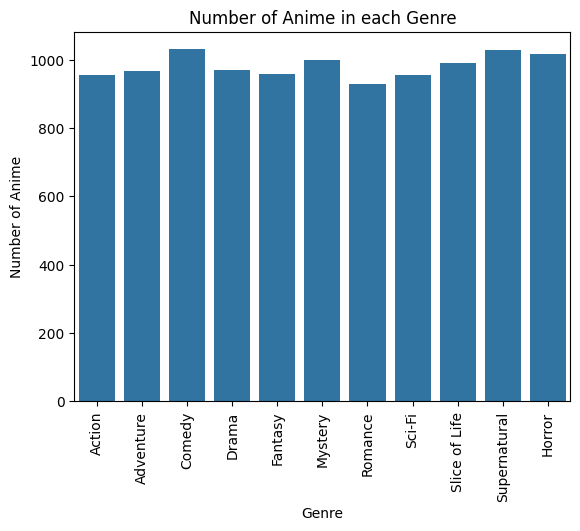

In [44]:
sns.barplot(x=genre_count['Genre'],y=platform_count['Count'])
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Number of Anime')
plt.title('Number of Anime in each Genre')
plt.show()


In [45]:
# Filtering the producers
producers={'Aniplex':0,'TV Tokyo':0,'Shueisha':0,'Kadokawa':0,'Bandai Namco':0,'Kadokawa':0,'Kodansha':0}
for i in anime_basics['Producers']:
    producer_count=flat(i,producers)
producer_count=pd.DataFrame(producer_count.items(),columns=['Producer','Count'])
producer_count=pd.DataFrame(producer_count.sort_values(by='Count',ascending=False))
producer_count

,Producer,Count
0,Aniplex,917
4,Bandai Namco,902
2,Shueisha,897
3,Kadokawa,896
5,Kodansha,883
1,TV Tokyo,879


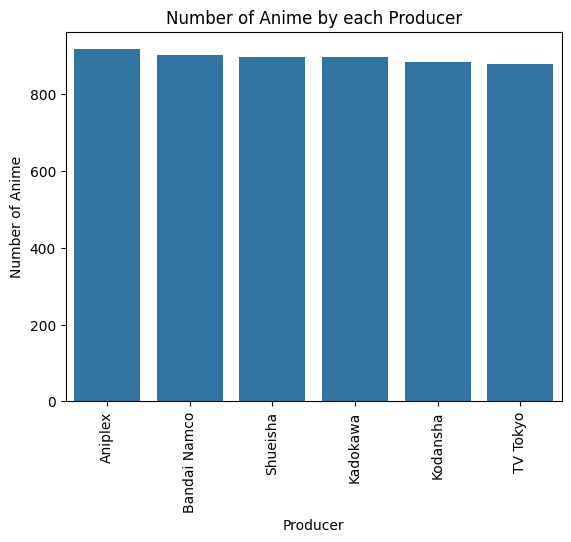

In [46]:
sns.barplot(x=producer_count['Producer'],y=producer_count['Count'])
plt.xticks(rotation=90)
plt.xlabel('Producer')
plt.ylabel('Number of Anime')
plt.title('Number of Anime by each Producer')
plt.show()

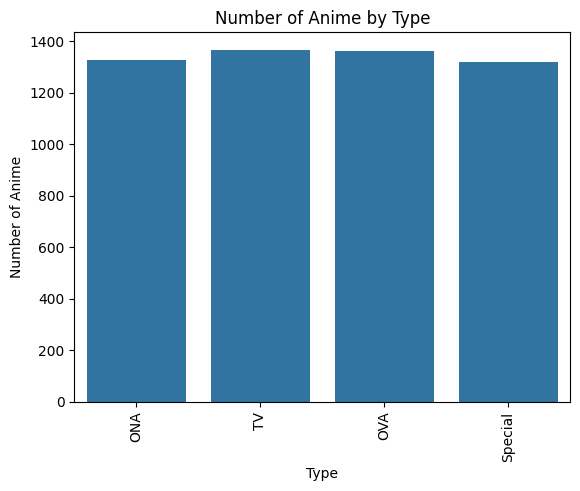

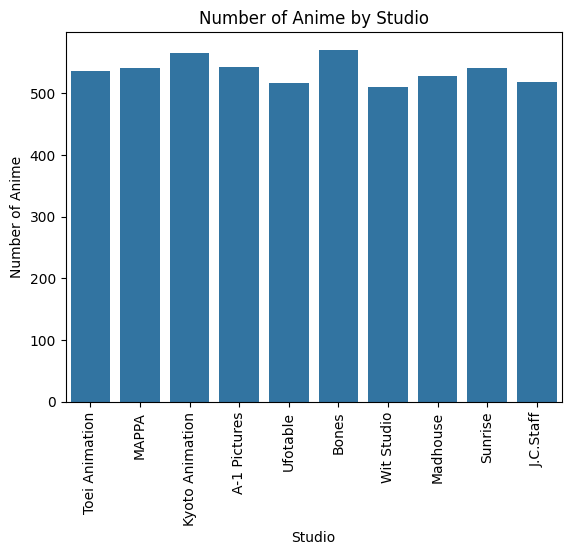

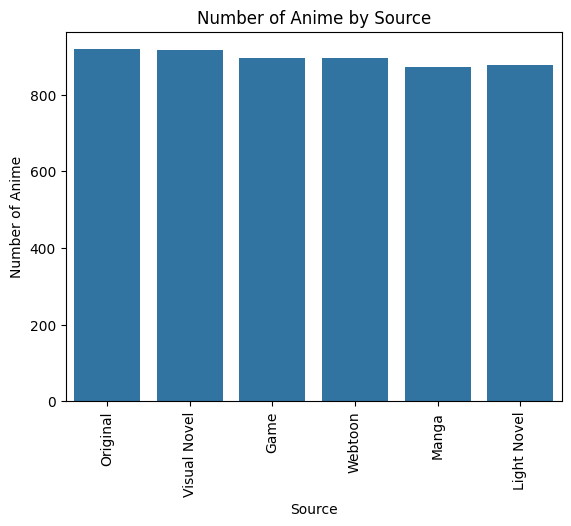

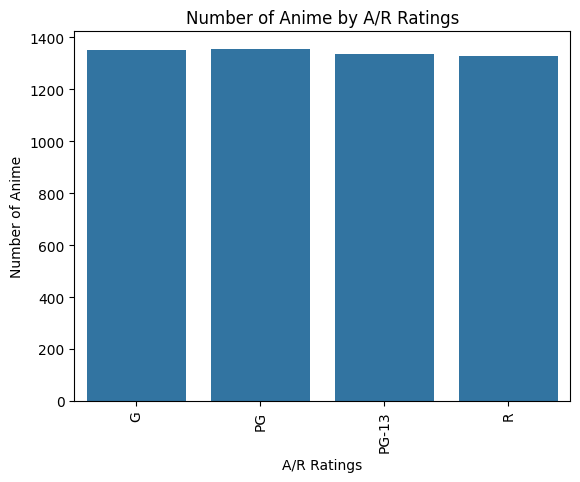

In [47]:
for i in anime_basics.columns:
    if i not in ['Anime ID','Title','Streaming Platform','Producers','Genre']:
        #print(anime_basics[i].value_counts())
        sns.countplot(x=anime_basics[i])
        plt.xticks(rotation=90)
        plt.xlabel(i)
        plt.ylabel('Number of Anime')
        plt.title('Number of Anime by '+i)
        plt
        plt.show()